In [177]:
%load_ext autoreload
%autoreload 2

from src.wmf import WeightedMatrixFactorization
import numpy as np

feedback_matrix = np.array([[3, 4, np.nan, 1, np.nan, np.nan, 5, np.nan, np.nan, np.nan],
                            [1, 3, np.nan, np.nan, np.nan, 3, np.nan, np.nan, 5, 5],
                            [1, np.nan, 1, 4, 4, np.nan, np.nan, np.nan, 3, 4]])

wmf = WeightedMatrixFactorization(
    feedback_matrix, 
    n_latents=200,
    n_iter=100,
    lambda_reg=0.05
    )

hist = wmf.fit(method='WALS', verbose=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Plot the loss

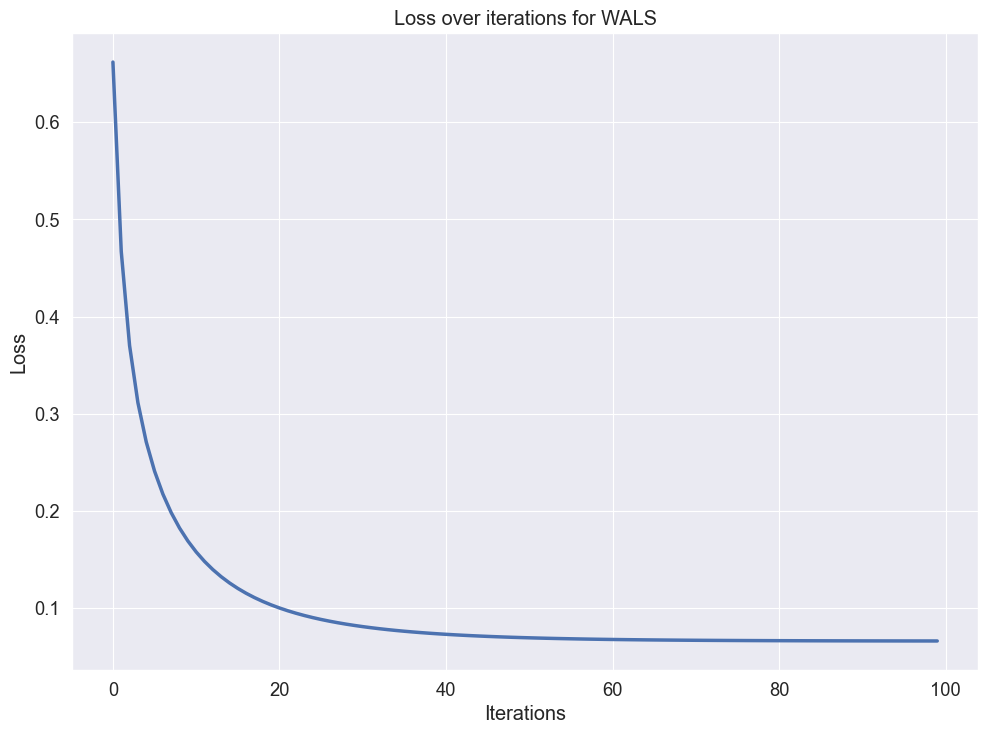

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns settings
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context('paper', font_scale=1.5, rc={"lines.linewidth": 2.5})


lists = sorted(hist.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

# lineplot 
sns.lineplot(x=list(hist.keys()), y=list(hist.values()))
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss over iterations for WALS")
plt.show()